In [41]:
import pandas, numpy, tensorflow
from tensorflow import keras

In [42]:
(X_train_full, y_train_full), (X_test, y_test) =  keras.datasets.cifar10.load_data()

In [43]:
import matplotlib.pyplot as plt

In [44]:
X_train.shape

(50000, 32, 32, 3)

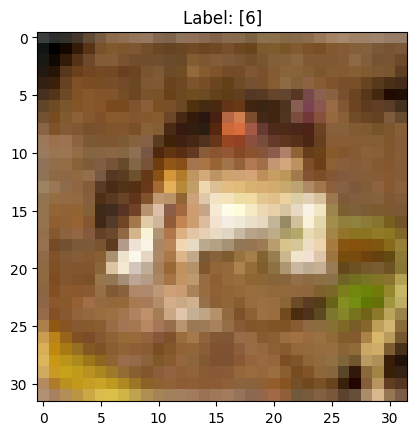

In [45]:
plt.imshow(X_train[0])
plt.title(f"Label: {y_train[0]}")
plt.show()

In [80]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu", kernel_initializer=keras.initializers.HeNormal()))
model.add(keras.layers.Dense(10, activation="softmax"))

In [81]:
early_stopping = keras.callbacks.EarlyStopping(patience=10)

In [82]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])

In [83]:
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [84]:
model_checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)

In [85]:
run_index = 1

In [86]:
import os
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks=[early_stopping, model_checkpoint, tensorboard_cb]

In [87]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [88]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 512), started 8:11:41 ago. (Use '!kill 512' to kill it.)

In [65]:
model.fit(X_train, y_train, epochs=100, validation_data=[X_valid, y_valid], callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 11s 6ms/step - loss: 3.0012 - accuracy: 0.2093 - val_loss: 2.0961 - val_accuracy: 0.2576
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9223 - accuracy: 0.2884 - val_loss: 1.9520 - val_accuracy: 0.2722
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8672 - accuracy: 0.3155 - val_loss: 1.9934 - val_accuracy: 0.2666
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8363 - accuracy: 0.3261 - val_loss: 1.8553 - val_accuracy: 0.3110
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8072 - accuracy: 0.3429 - val_loss: 1.9523 - val_accuracy: 0.2898
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7803 - accuracy: 0.3535 - val_loss: 1.8031 - val_accuracy: 0.3242
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7553 - accuracy: 0.3644 - val_loss: 1.7597 - val_a

In [67]:
%tensorboard --logdir=./my_cifar10_logs --port=6006

Reusing TensorBoard on port 6006 (pid 512), started 0:04:28 ago. (Use '!kill 512' to kill it.)

In [69]:
model = keras.models.load_model("my_cifar10_model.h5")

In [70]:
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 1ms/step - loss: 1.6710 - accuracy: 0.4122


[1.6709564924240112, 0.412200003862381]

In [101]:
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32,32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer=keras.initializers.HeNormal()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [102]:
optimizer = keras.optimizers.Nadam(learning_rate=5e-4)

In [103]:
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

In [104]:
model_checkpoint = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
import os
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks=[early_stopping, model_checkpoint, tensorboard_cb]

In [105]:
model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 20s 10ms/step - loss: 1.8423 - accuracy: 0.3389 - val_loss: 1.6725 - val_accuracy: 0.4070
Epoch 2/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.6655 - accuracy: 0.4065 - val_loss: 1.6454 - val_accuracy: 0.4124
Epoch 3/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.5959 - accuracy: 0.4326 - val_loss: 1.5192 - val_accuracy: 0.4542
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5458 - accuracy: 0.4507 - val_loss: 1.5134 - val_accuracy: 0.4674
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5018 - accuracy: 0.4668 - val_loss: 1.4521 - val_accuracy: 0.4860
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4642 - accuracy: 0.4803 - val_loss: 1.4148 - val_accuracy: 0.4954
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4318 - accuracy: 0.4926 - val_loss: 1.411

In [106]:
model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 1.2979 - accuracy: 0.5448


[1.2979010343551636, 0.5447999835014343]

In [100]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
numpy.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)
run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 20s 10ms/step - loss: 1.8349 - accuracy: 0.3418 - val_loss: 1.6458 - val_accuracy: 0.4182
Epoch 2/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.6642 - accuracy: 0.4080 - val_loss: 1.6013 - val_accuracy: 0.4262
Epoch 3/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5978 - accuracy: 0.4315 - val_loss: 1.5121 - val_accuracy: 0.4576
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5477 - accuracy: 0.4480 - val_loss: 1.5339 - val_accuracy: 0.4554
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.5040 - accuracy: 0.4645 - val_loss: 1.4616 - val_accuracy: 0.4822
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4673 - accuracy: 0.4791 - val_loss: 1.4287 - val_accuracy: 0.4904
Epoch 7/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4316 - accuracy: 0.4891 - val_loss: 1.4272 

[1.309217095375061, 0.5460000038146973]

In [107]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
numpy.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

model.fit(X_train, y_train, epochs=100,
          validation_data=(X_valid, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid, y_valid)

Epoch 1/100
1407/1407 [==============================] - 12s 7ms/step - loss: 4.6424 - accuracy: 0.1775 - val_loss: 2.3415 - val_accuracy: 0.1646
Epoch 2/100
1407/1407 [==============================] - 9s 6ms/step - loss: 2.0300 - accuracy: 0.2504 - val_loss: 2.2447 - val_accuracy: 0.2014
Epoch 3/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9482 - accuracy: 0.2868 - val_loss: 2.7435 - val_accuracy: 0.1448
Epoch 4/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9419 - accuracy: 0.2778 - val_loss: 2.1393 - val_accuracy: 0.2154
Epoch 5/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8698 - accuracy: 0.3104 - val_loss: 2.0151 - val_accuracy: 0.2850
Epoch 6/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.8363 - accuracy: 0.3276 - val_loss: 1.9668 - val_accuracy: 0.3038
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8065 - accuracy: 0.3388 - val_loss: 1.7925 - val_a

[1.5168100595474243, 0.46219998598098755]

In [110]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
numpy.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)
run_index = 1 
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 11s 6ms/step - loss: 1.8915 - accuracy: 0.3232 - val_loss: 1.7973 - val_accuracy: 0.3564
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6653 - accuracy: 0.4110 - val_loss: 1.7021 - val_accuracy: 0.3906
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5691 - accuracy: 0.4466 - val_loss: 1.6382 - val_accuracy: 0.4122
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4992 - accuracy: 0.4711 - val_loss: 1.5742 - val_accuracy: 0.4492
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4421 - accuracy: 0.4962 - val_loss: 1.5944 - val_accuracy: 0.4400
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3940 - accuracy: 0.5132 - val_loss: 1.5156 - val_accuracy: 0.4688
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3475 - accuracy: 0.5308 - val_loss: 1.5094 - val_a

[1.4377516508102417, 0.49239999055862427]

In [113]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
numpy.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
    model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_model.h5", monitor="val_accuracy", save_best_only=True)
run_index = 1 
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 15s 9ms/step - loss: 2.2015 - accuracy: 0.1881 - val_loss: 3.1968 - val_accuracy: 0.2228
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.9470 - accuracy: 0.2431 - val_loss: 4.1033 - val_accuracy: 0.2844
Epoch 3/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8651 - accuracy: 0.2829 - val_loss: 6.8043 - val_accuracy: 0.3096
Epoch 4/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8106 - accuracy: 0.3147 - val_loss: 5.2376 - val_accuracy: 0.3058
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7725 - accuracy: 0.3423 - val_loss: 7.3475 - val_accuracy: 0.3298
Epoch 6/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.7456 - accuracy: 0.3604 - val_loss: 6.2850 - val_accuracy: 0.3756
Epoch 7/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.7223 - accuracy: 0.3723 - val_loss: 8.0904 -

[3.1967594623565674, 0.22280000150203705]

In [115]:
model = keras.models.load_model("my_cifar10_alpha_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5099 - accuracy: 0.5012


[1.5099104642868042, 0.5012000203132629]

In [116]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
numpy.random.seed(42)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"))
model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

optimizer = keras.optimizers.Nadam(learning_rate=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_model.h5", monitor="val_accuracy", save_best_only=True)
run_index = 1 
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_{:03d}".format(run_index))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

model = keras.models.load_model("my_cifar10_alpha_model.h5")
model.evaluate(X_valid_scaled, y_valid)

Epoch 1/100
1407/1407 [==============================] - 11s 6ms/step - loss: 1.8958 - accuracy: 0.3257 - val_loss: 1.7849 - val_accuracy: 0.3826
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6624 - accuracy: 0.4166 - val_loss: 1.7842 - val_accuracy: 0.3952
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5707 - accuracy: 0.4497 - val_loss: 1.6358 - val_accuracy: 0.4340
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5052 - accuracy: 0.4744 - val_loss: 1.6056 - val_accuracy: 0.4574
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4506 - accuracy: 0.4938 - val_loss: 1.6097 - val_accuracy: 0.4506
Epoch 6/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4029 - accuracy: 0.5122 - val_loss: 1.5294 - val_accuracy: 0.4766
Epoch 7/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3604 - accuracy: 0.5259 - val_loss: 1.5452 - val_a

[1.7479296922683716, 0.5138000249862671]

In [122]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [123]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [128]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return numpy.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return numpy.argmax(Y_probas, axis=1)

In [129]:
keras.backend.clear_session()
tensorflow.random.set_seed(42)
numpy.random.seed(42)

y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = numpy.mean(y_pred == y_valid[:, 0])
accuracy

157/157 [==============================] - 0s 1ms/step


0.5126

In [135]:
n_epochs = 15
onecycle = OneCycleScheduler(math.ceil(len(X_train_scaled) / batch_size) * n_epochs, max_rate=0.05)

NameError: name 'OneCycleScheduler' is not defined